# Decision Trees & Ensemble Learning tutorial
## Libraries : Populating the iterative namespace¶

In [87]:
# Check required packages - Use pip install to install a new package 
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install scipy

'0.20.3'

In [54]:
import os
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import tree
# Ensemble Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
#from sklearn import cross_validation
from sklearn.model_selection import KFold, cross_val_score
import sklearn.model_selection as ms
from sklearn import metrics

from matplotlib import pyplot as plt
%matplotlib inline

## Load Data  for Classification

In [33]:
''' Pima-Indians-Diabetes-Data-Set 
DataSet description: https://www.kaggle.com/dssariya/pima-indians-diabetes-data-set 
A data frame with 768 observations on the following 9 variables.
V1: Number of times pregnant
V2: Plasma glucose concentration (glucose tolerance test)
V3: Diastolic blood pressure (mm Hg)
V4: Triceps skin fold thickness (mm)
V5: 2-Hour serum insulin (mu U/ml)
V6: Body mass index (weight in kg/(height in m)\^2)
V7: Diabetes pedigree function
V8: Age (years)
V9: Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)
'''
#url = "http://mlearn.ics.uci.edu/databases/pima-indians-diabetes/pima-indians-diabetes.data"
url = "../../datasets/diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)
print(data.shape)
data.head()

(768, 9)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(-0.5, 1.5)

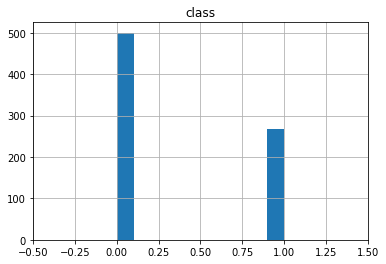

In [34]:
data['class'].value_counts()
#class distribution
data.hist(column = 'class')
plt.xlim(-0.5,1.5)

conclusion ?

##### Visualise Decision Tree using GraphViz

In [35]:
# GraphViz - Tree visualisation
import pydotplus as pydot #Python interface to Graphviz's Dot language - pip install pydotplus #MacOS: brew install graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO
# Download graphviz
os.environ["PATH"] += os.pathsep + "/usr/local/Cellar/graphviz/2.38.0_1/bin/" # make
#os.environ["PATH"] += os.pathsep + "D:\\path\to\graphviz\\bin" # Windows
#print(os.environ["PATH"])

In [36]:
#Instanciate a Decision Tree Classifier and display default parametes
dtc = tree.DecisionTreeClassifier(max_depth=3) #max_depth=1, criterion="entropy")
#Train the classifier
X, y = data[names[:-1]], data['class']
dtc.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Display tree model

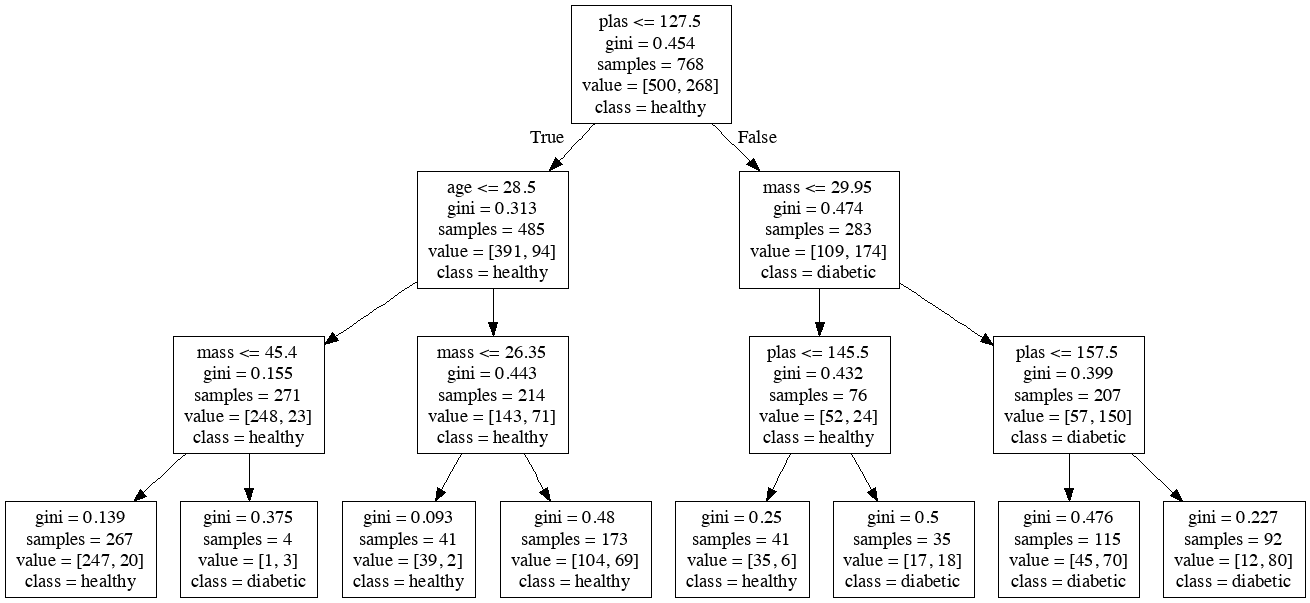

In [37]:
dot_data = StringIO()
tree.export_graphviz(dtc, out_file=dot_data, feature_names=X.columns, class_names=['healthy', 'diabetic']) #,feature_names=predictor)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Conclusion?
* Interpretation of values in tree nodes from Root to leaves
* Vary the max_depth parameter and display tree

## CrossValidation Strategy - Model selection

In [38]:
cv_url =  'crossval.png' #'http://i.imgur.com/N9HZktu.png'
Image(url=cv_url)

In [43]:
CV_generator = KFold(n_splits=10, shuffle=True).split(X,y)
#nb folds of cross validation
for (train_idx, test_idx) in CV_generator:
    print("train_size:",len(train_idx),"some-train-indexes:", train_idx[:10]) 
    print("train_size:",len(test_idx), "some-test-indexes:", test_idx[:10]) 
    input()

train_size: 691 some-train-indexes: [0 1 2 3 4 5 6 7 8 9]
train_size: 77 some-test-indexes: [11 13 17 29 34 44 49 52 70 71]
train_size: 691 some-train-indexes: [0 1 2 3 4 5 6 7 8 9]
train_size: 77 some-test-indexes: [18 21 26 33 39 53 59 60 62 65]
train_size: 691 some-train-indexes: [ 0  2  3  4  5  6  7  9 10 11]
train_size: 77 some-test-indexes: [ 1  8 15 42 58 61 73 77 79 85]
train_size: 691 some-train-indexes: [ 1  4  5  6  7  8  9 10 11 12]
train_size: 77 some-test-indexes: [ 0  2  3 14 16 22 24 32 45 51]
train_size: 691 some-train-indexes: [0 1 2 3 4 5 6 7 8 9]
train_size: 77 some-test-indexes: [ 19  36  68  74  88  97 101 121 125 131]
train_size: 691 some-train-indexes: [ 0  1  2  3  4  5  7  8 11 12]
train_size: 77 some-test-indexes: [ 6  9 10 23 27 40 43 48 56 67]
train_size: 691 some-train-indexes: [ 0  1  2  3  4  6  7  8  9 10]
train_size: 77 some-test-indexes: [  5  46  50  54  75  86 102 105 107 120]
train_size: 691 some-train-indexes: [ 0  1  2  3  4  5  6  8  9 10]
trai

##### 0- Decision Tree model
Generate decision rules using simple series of Yes or No questions to classify

In [44]:
#CV_generator = KFold(n_splits=10, shuffle=True).split(X,y)
dtc = tree.DecisionTreeClassifier(max_depth=3) # default max_depth=?    
scores = []
for idx_train, idx_test in KFold(n_splits=10, shuffle=True).split(X,y):
    X_train, X_test = X.iloc[idx_train], X.iloc[idx_test]
    y_train, y_test = y.iloc[idx_train], y.iloc[idx_test]
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    acc_score = metrics.accuracy_score(y_test, y_pred)
    scores.append(acc_score)
print("CrossVal rounds scores:", scores)
print("Average Accuracy: %0.2f (+/- %0.2f)" % (np.mean(scores), np.std(scores) * 2))

CrossVal rounds scores: [0.6753246753246753, 0.7662337662337663, 0.7402597402597403, 0.7532467532467533, 0.7662337662337663, 0.6753246753246753, 0.7792207792207793, 0.7662337662337663, 0.7368421052631579, 0.75]
Average Accuracy: 0.74 (+/- 0.07)


##### 1- Random Forest Model
Strategy of trees construction to reduce correlation: Each tree is built using sampling with replacement of training dataset and a random subset of features

In [47]:
kfold=10

In [48]:
rfc = RandomForestClassifier(n_estimators=100) # n_estimators=?, max_features=?
scores = cross_val_score(rfc, X, y, cv=kfold)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.76 (+/- 0.11)


##### 2- ExtraTrees Model
Another modification of bagging where random trees are constructed from samples of the training dataset.

In [50]:
etc = ExtraTreesClassifier(n_estimators=100)
scores = cross_val_score(etc, X, y, cv=kfold)
print("etc accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

etc accuracy: 0.76 (+/- 0.11)


##### 3- Gradient Boosting Model
Combines a sequence of trees that attempt to correct the mistakes of the models before them in the sequence.

In [52]:
gbc = GradientBoostingClassifier(n_estimators=100)   
scores = cross_val_score(gbc, X, y, cv=kfold)
print("gbc accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

gbc accuracy: 0.76 (+/- 0.11)


In [58]:
##### 4- eXtreme Gradient Boosting
#Very fast and effective version of Gradient boosting
xgb = XGBClassifier(n_estimators=100)
scores = cross_val_score(gbc, X, y, cv=kfold)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.76 (+/- 0.10)


? conclusion

### Variables Importance

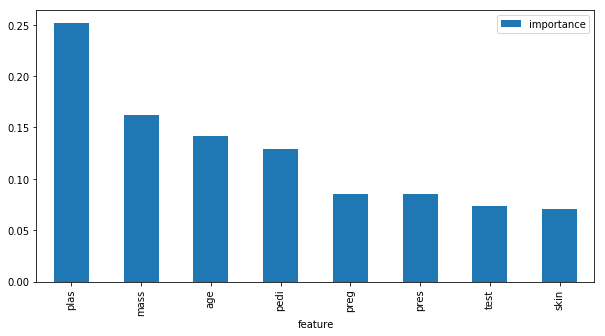

In [59]:
# Plot the feature importances of the forest
rfc.fit(X,y)
importances = rfc.feature_importances_
#show to plot importances
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(importances,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
#print(importances)
importances.plot(kind='bar', figsize=(10,5))

Conclusion ?

## TrainTest Strategy - Model evaluation

### Split TrainTest

In [60]:
import sklearn.utils
data = sklearn.utils.shuffle(data)
data['is_train'] = np.random.uniform(0, 1, len(data)) <= 3/4 #.75
train, test = data[data['is_train']==True], data[data['is_train']==False]
print("size train/test: {0}/{1}".format(train.shape[0], test.shape[0]))
X_train, y_train = train[names[:-1]], train['class']
X_test, y_test = test[names[:-1]], test['class']

size train/test: 595/173


### Performance evaluation

In [61]:
from sklearn import metrics

In [63]:
clf_map = {'RandomForest': rfc, 'ExtraTrees': etc, 'GradientBoosting': gbc, 'XGBoost':xgb }
clf_preds_map = {}
for cname, clf in clf_map.items():
    clf.fit(X_train, y_train)
    clf_preds_map[cname] = clf.predict(X_test)

##### Accuracy

In [64]:
for cname, _ in clf_map.items():
    print("=> {0} accuracy = [{1:.2f}]]".format(cname, metrics.accuracy_score(y_test,clf_preds_map[cname])))

=> RandomForest accuracy = [0.74]]
=> ExtraTrees accuracy = [0.78]]
=> GradientBoosting accuracy = [0.77]]
=> XGBoost accuracy = [0.77]]


Conclusion ?

##### Confusion matrix

In [65]:
conf_map = {}
for cname, _ in clf_map.items():
    conf_map[cname]=metrics.confusion_matrix(y_test, clf_preds_map[cname])

Confusion Matrix of the 3 Classifiers


/Users/habiboulaye/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


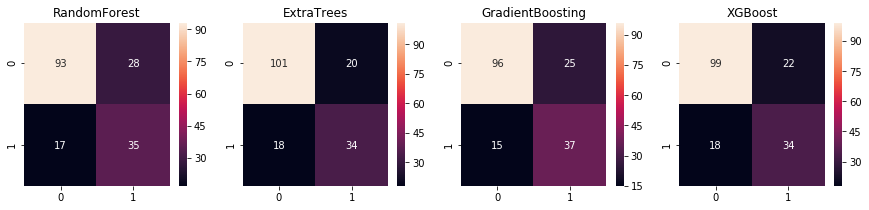

In [84]:
import seaborn as sns
plt.figure(figsize=(15, 3))
print('Confusion Matrix of the 3 Classifiers')
nb_cls = len(clf_map)
plt.subplot(1, nb_cls, 1) # starts from 1
for i, cname in enumerate(conf_map):
    plt.subplot(1, nb_cls, i+1)
    plt.title(cname);
    sns.heatmap(conf_map[cname], annot=True,  fmt='')

##### Area Under Curve - Receiver Operating Characteristic

=> RandomForest auc_roc [0.84] ]
=> ExtraTrees auc_roc [0.85] ]
=> GradientBoosting auc_roc [0.81] ]
=> XGBoost auc_roc [0.83] ]


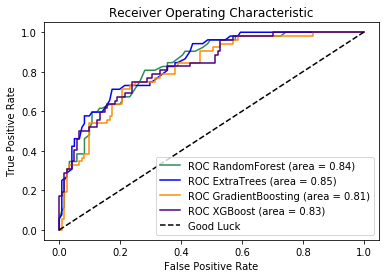

In [85]:
colors = ['seagreen', 'blue', 'darkorange', 'indigo']
i = 0
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
for cname, clf in clf_map.items():
    fpr, tpr, thresholds = metrics.roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc = metrics.auc(fpr, tpr)
    print("=> {0} auc_roc [{1:.2f}] ]".format(cname, roc_auc))
    plt.plot(fpr, tpr, color=colors[i],label='ROC {0} (area = {1:.2f})'.format(cname, roc_auc))
    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', color='k', label='Good Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Conclusion ?